## Eigenface(特征脸)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_lfw_people

In [12]:
faces = fetch_lfw_people(download_if_missing=False)

In [26]:
for i in faces.keys():
    if i != 'DESCR':
        print(i,"shape is ",faces[i].shape)

data shape is  (7272, 2914)
images shape is  (7272, 62, 47)
target shape is  (7272,)
target_names shape is  (1801,)


In [29]:
random_indexes = np.random.permutation(len(faces.data))  # 传入一个array或整数，将其打乱排列顺序并返回
X = faces.data[random_indexes]

In [30]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

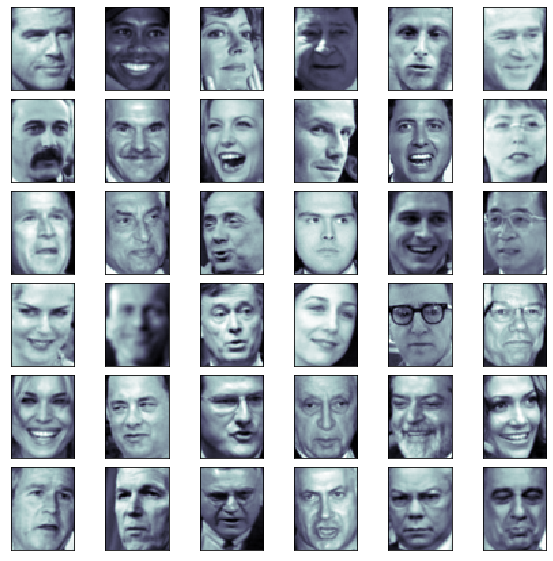

In [32]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

## 特征脸

In [33]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 1min 40s, sys: 4.11 s, total: 1min 44s
Wall time: 28 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [35]:
pca.components_.shape

(2914, 2914)

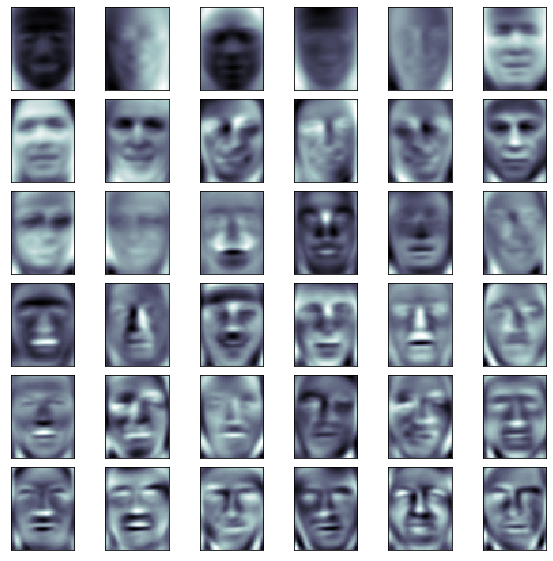

In [36]:
plot_faces(pca.components_[:36])

In [37]:
from sklearn.decomposition import PCA
pca2 = PCA(0.9)
pca2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca2.components_.shape

(90, 2914)

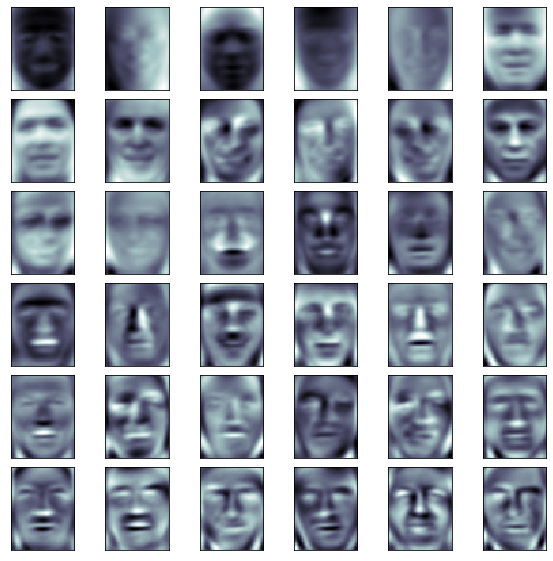

In [41]:
plot_faces(pca2.components_[:36])

## 人脸识别系统

In [44]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [45]:
from sklearn.model_selection import train_test_split
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 666)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized')
pca.fit(X_train)

In [ ]:
def FaceID()